In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [2]:
# checking pep8 compliance
%load_ext pycodestyle_magic
%pycodestyle_on

## Preliminary analysis

In [3]:
d = pd.read_csv('olist_complet.csv', index_col=0)
d.shape

(119154, 40)

In [4]:
d.head(2)

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,order_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,...,payment_value,review_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp,seller_zip_code_prefix,seller_city,seller_state
0.0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409.0,franca,SP,00e7ee1b050b8499577073aeb2a297a1,delivered,2017-05-16 15:05:35,2017-05-16 15:22:12,2017-05-23 10:47:57,...,146.87,88b8b52d46df026a9d1ad2136a59b30b,4.0,NaN,NaN,2017-05-26 00:00:00,2017-05-30 22:34:40,8577.0,itaquaquecetuba,SP
1.0,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790.0,sao bernardo do campo,SP,29150127e6685892b6eab3eec79f59c7,delivered,2018-01-12 20:48:24,2018-01-12 20:58:32,2018-01-15 17:14:59,...,335.48,02fc48a9efa3e3d0f1a8ea26507eeec3,5.0,NaN,NaN,2018-01-30 00:00:00,2018-02-10 22:43:29,88303.0,itajai,SC


In [5]:
for col in d.columns:
    print(d[col].unique().size, '\t', col)

99443 	 customer_id
96098 	 customer_unique_id
14994 	 customer_zip_code_prefix
4119 	 customer_city
27 	 customer_state
99442 	 order_id
9 	 order_status
98876 	 order_purchase_timestamp
90734 	 order_approved_at
81019 	 order_delivered_carrier_date
95665 	 order_delivered_customer_date
460 	 order_estimated_delivery_date
22 	 order_item_id
32952 	 product_id
3096 	 seller_id
93319 	 shipping_limit_date
5969 	 price
7000 	 freight_value
74 	 product_category_name
67 	 product_name_lenght
2961 	 product_description_lenght
20 	 product_photos_qty
2205 	 product_weight_g
100 	 product_length_cm
103 	 product_height_cm
96 	 product_width_cm
72 	 product_category_name_english
30 	 payment_sequential
6 	 payment_type
25 	 payment_installments
29078 	 payment_value
99174 	 review_id
6 	 review_score
4601 	 review_comment_title
36922 	 review_comment_message
638 	 review_creation_date
99009 	 review_answer_timestamp
2247 	 seller_zip_code_prefix
612 	 seller_city
24 	 seller_state


We have 96,098 unique customers for 99,442 orders. We deduce that a majority of customers have made 1 single order.

#### How many orders per customer ? 

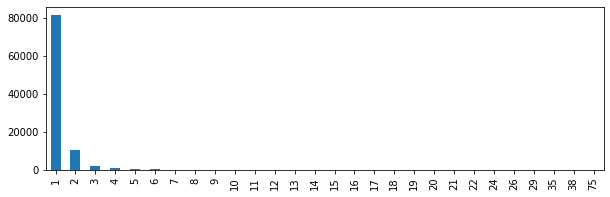

In [6]:
nb_order = d.customer_unique_id.value_counts()
nb_order.value_counts().sort_index().plot.bar(figsize=(10, 3))

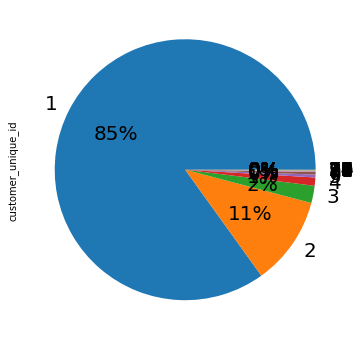

In [8]:
nb_order.value_counts().sort_index().plot.pie(figsize=(6, 6),
                                              autopct='%1.0f%%',
                                              textprops=dict(fontsize=20))
plt.show()

In [9]:
print(round(100 * nb_order[nb_order == 1].shape[0] / 96098, 2),
      '% des clients ont passé 1 commande')
print(round(100 * nb_order[nb_order == 2].shape[0] / 96098, 2),
      '% des clients ont passé 2 commandes')
print(round(100 * nb_order[nb_order > 2].shape[0] / 96098, 2),
      '% des clients ont passé 3 ou + commandes')

84.92 % des clients ont passé 1 commande
10.98 % des clients ont passé 2 commandes
4.11 % des clients ont passé 3 ou + commandes


#### How many items per order?

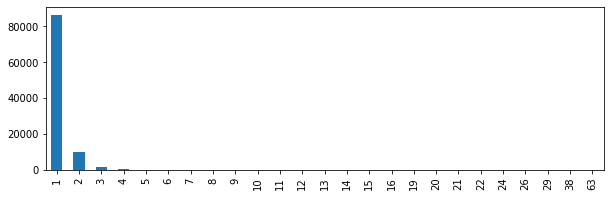

In [10]:
nb_items = d.order_id.value_counts()
nb_items.value_counts().sort_index().plot.bar(figsize=(10, 3))

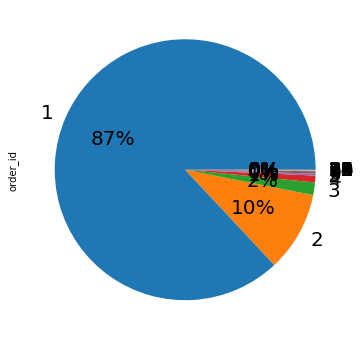

In [11]:
nb_items = d.order_id.value_counts()
nb_items.value_counts().sort_index().plot.pie(figsize=(6, 6),
                                              autopct='%1.0f%%',
                                              textprops=dict(fontsize=20))
plt.show()

In [12]:
n_order = d['order_id'].unique().size

In [13]:
print(
    round(100 * nb_items[nb_items == 1].shape[0]/n_order, 1),
    '% des commandes contiennent 1 article\n',
    round(100 * nb_items[nb_items == 2].shape[0]/n_order, 1),
    '% des commandes contiennent 2 articles\n',
    round(100 * nb_items[nb_items > 2].shape[0]/n_order, 1),
    '% des commandes contiennent 3 ou + articles')

87.0 % des commandes contiennent 1 article
 9.9 % des commandes contiennent 2 articles
 3.1 % des commandes contiennent 3 ou + articles


#### Average cost of purchased items

In [14]:
round(d['price'].mean(), 2)

120.65

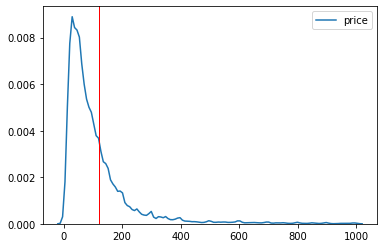

In [15]:
sns.kdeplot(d[d['price'] < 1000]['price'])
plt.axvline(d['price'].mean(), c='red', lw=1)

In [16]:
d['payment_value'].mean()

172.7356700909745

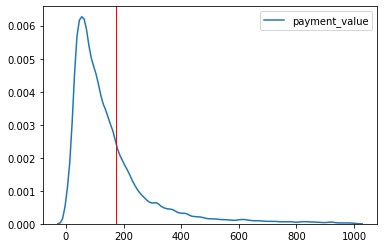

In [17]:
sns.kdeplot(d[d['payment_value'] < 1000]['payment_value'])
plt.axvline(d['payment_value'].mean(), c='red', lw=1)
plt.show()

#### Freight Value

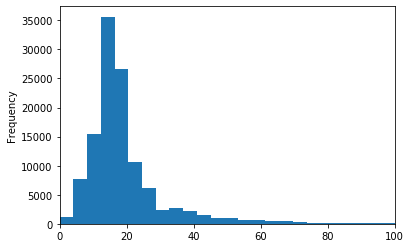

In [18]:
# Montant des frais de port
d['freight_value'].plot.hist(bins=100)
plt.xlim(0, 100)
plt.show()

#### Payment type

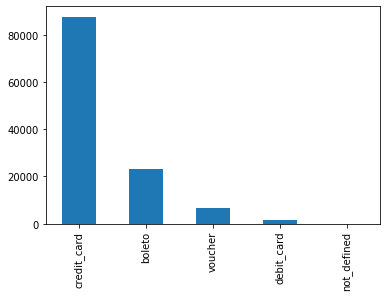

In [19]:
d['payment_type'].value_counts().plot.bar()

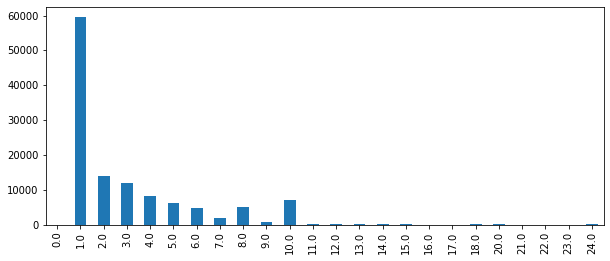

In [22]:
# Number of installments
d['payment_installments'].value_counts().sort_index().plot.bar(figsize=(10, 4))

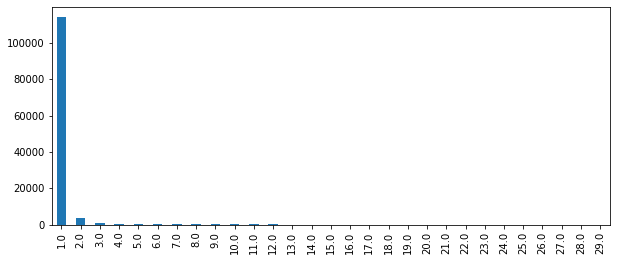

In [23]:
d['payment_sequential'].value_counts().sort_index().plot.bar(figsize=(10, 4))

#### Categories of most ordered items

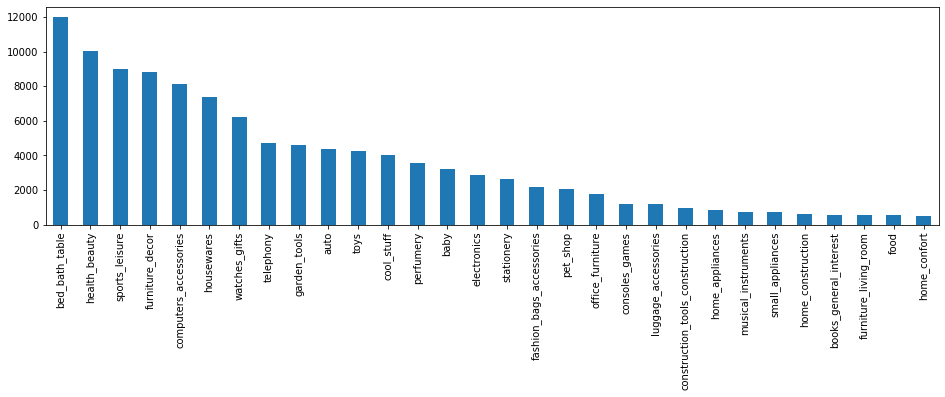

1:80: E501 line too long (81 > 79 characters)


In [24]:
d['product_category_name_english'].value_counts()[0:30].plot.bar(figsize=(16, 4))

In [25]:
d['product_category_name_english'].unique()

array(['office_furniture', 'housewares', 'home_confort', 'sports_leisure',
       'computers_accessories', nan, 'toys', 'furniture_decor', 'auto',
       'air_conditioning', 'telephony', 'health_beauty', 'garden_tools',
       'pet_shop', 'bed_bath_table', 'baby', 'watches_gifts',
       'kitchen_dining_laundry_garden_furniture', 'perfumery', 'art',
       'stationery', 'fashio_female_clothing', 'consoles_games',
       'construction_tools_lights', 'food_drink', 'drinks', 'cool_stuff',
       'fashion_bags_accessories', 'home_construction',
       'luggage_accessories', 'electronics', 'home_appliances_2',
       'fashion_male_clothing', 'small_appliances',
       'small_appliances_home_oven_and_coffee', 'books_general_interest',
       'home_appliances', 'costruction_tools_tools',
       'signaling_and_security', 'musical_instruments',
       'construction_tools_construction', 'music', 'fashion_shoes',
       'industry_commerce_and_business', 'fashion_underwear_beach',
       'dvds_blu

#### Customer location

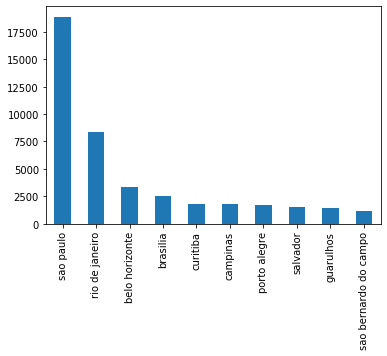

In [26]:
d['customer_city'].value_counts()[0:10].plot.bar()

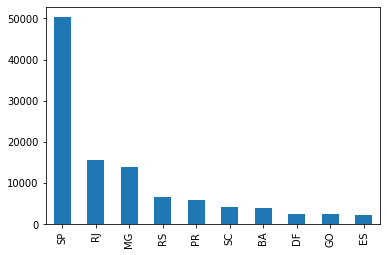

In [27]:
d['customer_state'].value_counts()[0:10].plot.bar()

#### Review score

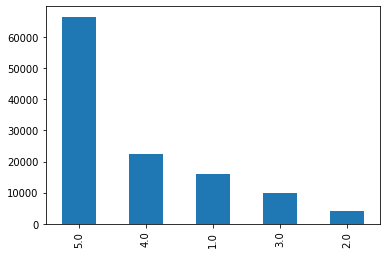

In [28]:
d['review_score'].value_counts().plot.bar()

#### Order status

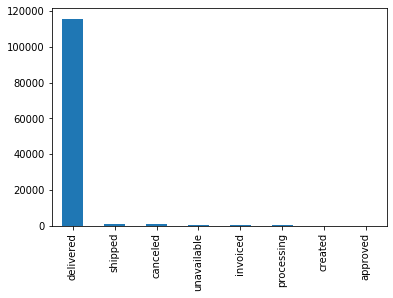

In [29]:
d['order_status'].value_counts().plot.bar()

#### Number of photos of the product

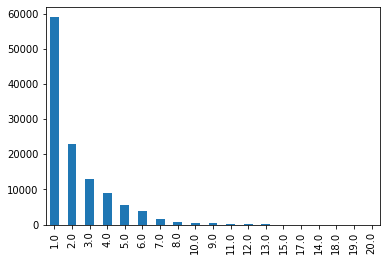

In [30]:
d['product_photos_qty'].value_counts().plot.bar()

#### Product features

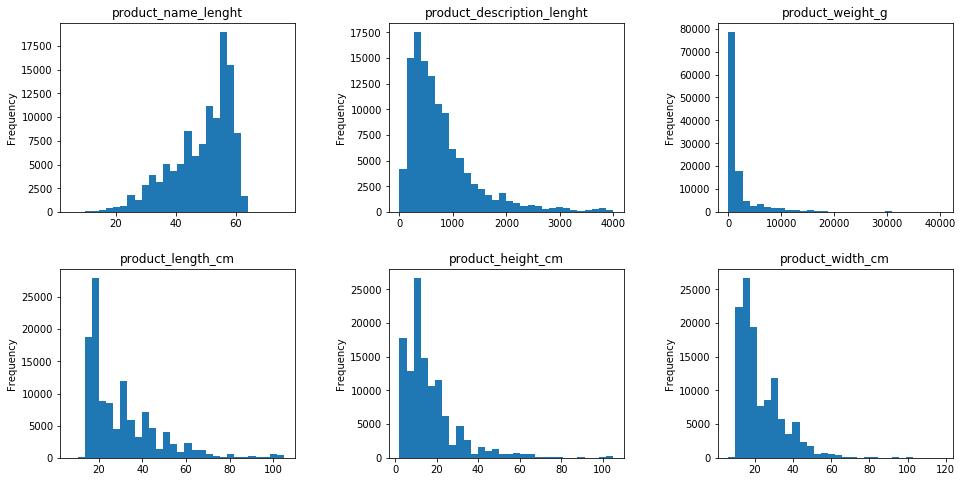

In [31]:
fig = plt.figure(figsize=(16, 8))
for i, c in enumerate(['product_name_lenght', 'product_description_lenght',
                       'product_weight_g', 'product_length_cm',
                       'product_height_cm', 'product_width_cm']):
    ax = fig.add_subplot(2, 3, i+1)
    d[c].plot.hist(bins=30, ax=ax)
    ax.set_title(c)
fig.subplots_adjust(hspace=0.3, wspace=0.4)

### Correlations

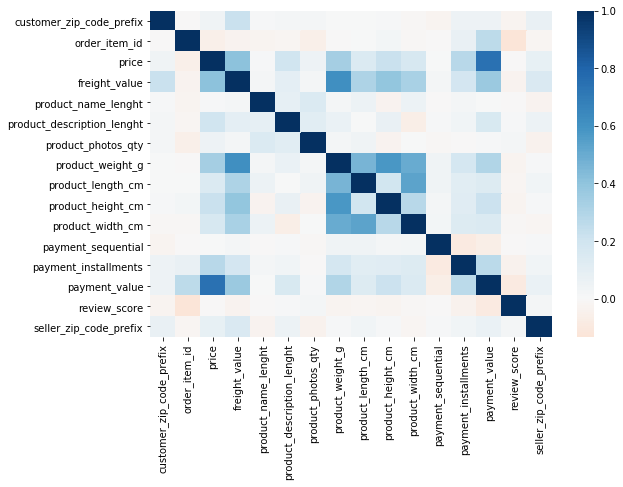

In [32]:
fig = plt.figure(figsize=(9, 6))
sns.heatmap(d.corr(), cmap='RdBu', center=0)
plt.show()

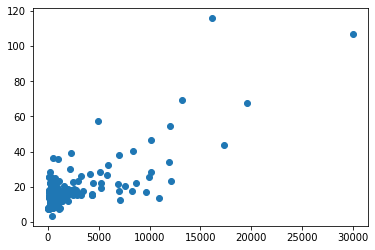

In [33]:
plt.scatter(d.product_weight_g[0:200], d.freight_value[0:200])

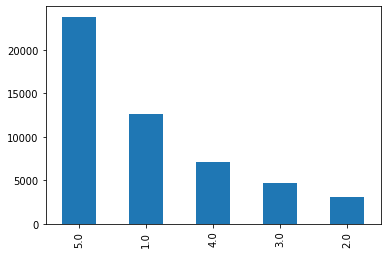

In [34]:
d.review_score[d['review_comment_message'].notnull()].value_counts().plot.bar()

In [35]:
print('note moyenne : ', round(d.review_score.mean(), 2),
      '\nnote moyenne si commentaire laissé :',
      round(d.review_score[d['review_comment_message'].notnull()].mean(), 2))

note moyenne :  4.0 
note moyenne si commentaire laissé : 3.52


## Dataset reduction

We saw that 85% of the customers have made only one order on the site, and in 84% of the cases, they have purchased only one product. To simplify the dataset, we will keep 1 order and 1 product per customer, while maintaining the number of products purchased and the total amount of the order.

In [36]:
# We keep 1 row per unique customer and the number of purchased products
d2 = d.drop_duplicates(subset=['customer_unique_id'], keep='last')

In [37]:
d2['order_item_id'].unique()

array([ 1.,  3.,  2., nan,  5.,  4.,  6.,  7., 10.,  8., 15., 12.,  9.,
       20., 11., 13., 21., 14.])

In [38]:
d2[d2['order_item_id'].isnull()].sample(5).iloc[:, 5:27]

,order_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,order_item_id,product_id,seller_id,...,freight_value,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,product_category_name_english
37650.0,8d6342c5d498f0042ad00193ce3038c8,unavailable,2017-10-02 08:56:39,2017-10-03 04:14:33,NaN,NaN,2017-10-26 00:00:00,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
78452.0,fb4ea753f638936f56b4df5d03dc07bb,unavailable,2018-01-13 20:11:23,2018-01-16 03:36:36,NaN,NaN,2018-01-30 00:00:00,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
35587.0,e8e186c0ebe18282aada53c56e7da34f,canceled,2017-05-02 07:34:35,NaN,NaN,NaN,2017-05-29 00:00:00,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
99388.0,75020ffff57f14ba95e2562980ae510f,unavailable,2017-09-19 17:40:29,2017-09-19 17:55:16,NaN,NaN,2017-10-11 00:00:00,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
28209.0,dadc23575c27fa7a66ce0310807865ba,unavailable,2018-05-08 15:05:15,2018-05-08 15:15:26,NaN,NaN,2018-06-04 00:00:00,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


We also suppress the canceled and unavailable orders

In [39]:
d3 = d2.dropna(subset=['order_item_id'])

## Feature Selection

We do not keep data about the sellers, because here we want to study the customers

In [40]:
# We select only the relevant indicators
d3 = d3.loc[:, ['order_purchase_timestamp', 'customer_state', 'order_item_id',
                'product_category_name_english', 'product_weight_g',
                'product_length_cm', 'product_height_cm', 'product_width_cm',
                'payment_type', 'payment_value', 'payment_installments',
                'review_score']]

## Missing values

In [41]:
# Column fill rate
d3.count() / d3.shape[0]

order_purchase_timestamp         1.000000
customer_state                   1.000000
order_item_id                    1.000000
product_category_name_english    0.985332
product_weight_g                 0.999843
product_length_cm                0.999843
product_height_cm                0.999843
product_width_cm                 0.999843
payment_type                     0.999990
payment_value                    0.999990
payment_installments             0.999990
review_score                     1.000000
dtype: float64

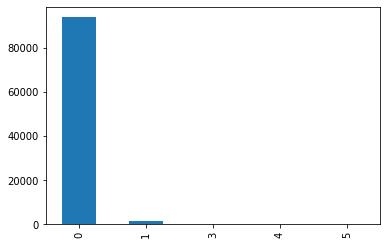

In [42]:
# Number of missing values per row
(d3.shape[1] - d3.count(axis=1)).value_counts().sort_index().plot.bar()

In [43]:
# We delete the row with 1 missing value or more
d3.dropna(inplace=True)

In [44]:
# Checking how many rows were deleted
d2.shape[0]-d3.shape[0]

2120

## Feature engineering

In [45]:
d3.info()

<class 'pandas.core.frame.DataFrame'>
Float64Index: 93978 entries, 0.0 to 119150.0
Data columns (total 12 columns):
order_purchase_timestamp         93978 non-null object
customer_state                   93978 non-null object
order_item_id                    93978 non-null float64
product_category_name_english    93978 non-null object
product_weight_g                 93978 non-null float64
product_length_cm                93978 non-null float64
product_height_cm                93978 non-null float64
product_width_cm                 93978 non-null float64
payment_type                     93978 non-null object
payment_value                    93978 non-null float64
payment_installments             93978 non-null float64
review_score                     93978 non-null float64
dtypes: float64(8), object(4)
memory usage: 9.3+ MB


### New variable: 'recency'

In [56]:
from datetime import datetime as dt

In [59]:
d3['order_date'] = d3.iloc[:, 0].apply(lambda x:
                                       dt.strptime(x, '%Y-%m-%d %H:%M:%S'))

#### Oldest and latest order

In [60]:
d3['order_date'].max() - d3['order_date'].min()

Timedelta('728 days 11:51:38')

There were 728 days (approximately 2 years) between the oldest and most recent order made on the site (based on the data provided). We will create a new variable 'recency' which is the relative oldness of the order, compared to the latest order.

In [61]:
def nb_days(date):
    duration = d3['order_date'].max() - date
    return duration.days

In [62]:
d3['recency'] = d3['order_date'].apply(nb_days)

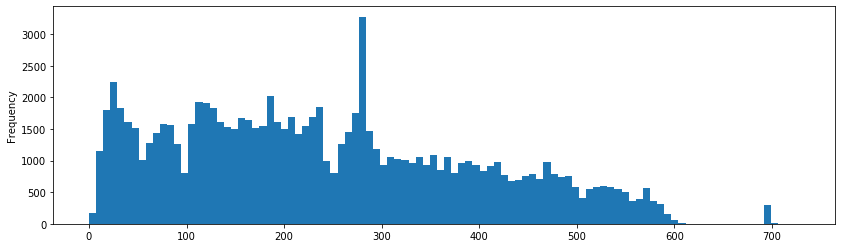

In [63]:
d3['recency'].plot.hist(bins=100, figsize=(14, 4))

### Customer_state > 6 categories

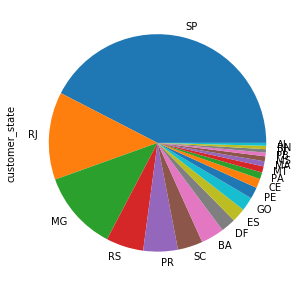

In [64]:
d3['customer_state'].value_counts()[0:20].plot.pie(figsize=(5, 5))

In [65]:
def state_cat(state):
    if state in ['SP', 'RJ', 'MG', 'RS', 'PR']:
        return state
    else:
        return 'other'


d3['customer_state_cat'] = d3['customer_state'].apply(state_cat)

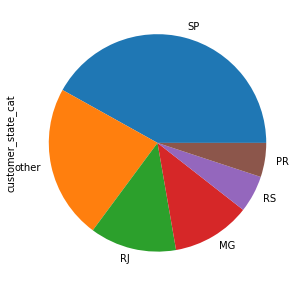

In [66]:
d3['customer_state_cat'].value_counts().plot.pie(figsize=(5, 5))

### Order_item_id > boolean value

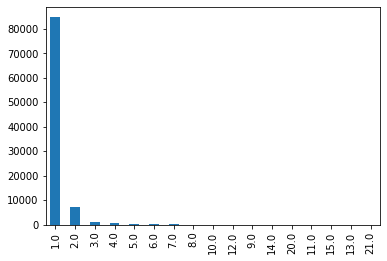

In [67]:
d3['order_item_id'].value_counts().plot.bar()

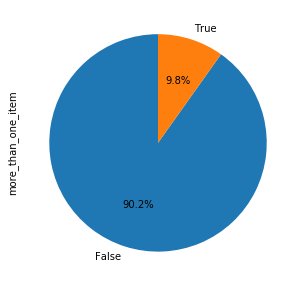

In [68]:
d3['more_than_one_item'] = d3['order_item_id'] > 1
d3['more_than_one_item'].value_counts().plot.pie(startangle=90,
                                                 autopct='%1.1f%%',
                                                 figsize=(5, 5))
plt.show()

### Product_category_name > grouping into broader categories

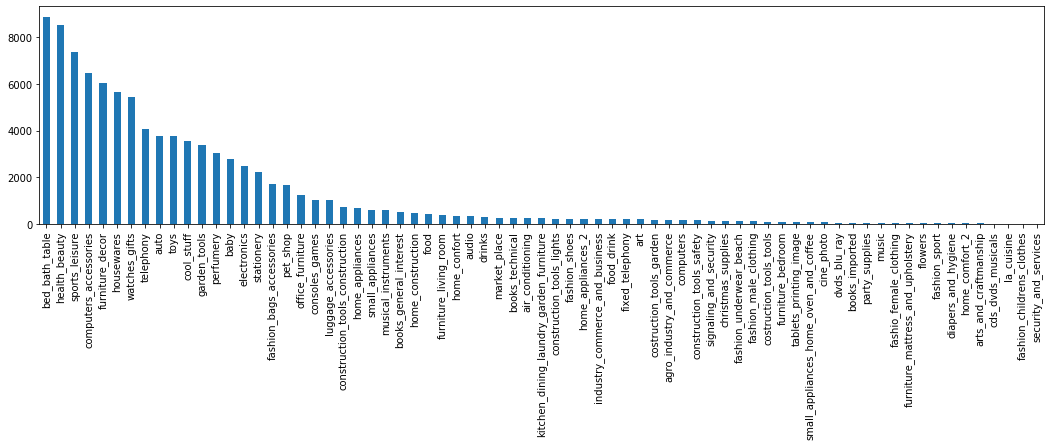

In [69]:
d3['product_category_name_english'].value_counts().plot.bar(figsize=(18, 4))

In [70]:
main_cats = {
    'construction_tools_construction': 'construction',
    'construction_tools_lights': 'construction',
    'construction_tools_safety': 'construction',
    'costruction_tools_tools': 'construction',
    'costruction_tools_garden': 'construction',
    'home_construction': 'construction',

    'furniture_bedroom': 'furniture',
    'furniture_decor': 'furniture',
    'furniture_living_room': 'furniture',
    'furniture_mattress_and_upholstery': 'furniture',
    'bed_bath_table': 'furniture',
    'kitchen_dining_laundry_garden_furniture': 'furniture',
    'office_furniture': 'furniture',
    'christmas_supplies': 'furniture',
    'party_supplies': 'furniture',

    'home_appliances': 'home_garden',
    'home_appliances_2': 'home_garden',
    'home_comfort_2': 'home_garden',
    'home_confort': 'home_garden',
    'air_conditioning': 'home_garden',
    'housewares': 'home_garden',
    'stationery': 'home_garden',
    'flowers': 'home_garden',
    'garden_tools': 'home_garden',
    'small_appliances_home_oven_and_coffee': 'home_garden',

    'auto': 'auto',

    'drinks': 'food_drink',
    'food': 'food_drink',
    'food_drink': 'food_drink',
    'la_cuisine': 'food_drink',

    'electronics': 'electronics',
    'audio': 'electronics',
    'tablets_printing_image': 'electronics',
    'telephony': 'electronics',
    'fixed_telephony': 'electronics',
    'small_appliances': 'electronics',
    'computers_accessories': 'electronics',
    'computers': 'electronics',
    'consoles_games': 'electronics',

    'sports_leisure': 'sports',
    'fashion_sport': 'sports',

    'art': 'art_leisure',
    'arts_and_craftmanship': 'art_leisure',
    'musical_instruments': 'art_leisure',
    'cine_photo': 'art_leisure',
    'dvds_blu_ray': 'art_leisure',
    'cds_dvds_musicals': 'art_leisure',
    'music': 'art_leisure',
    'books_general_interest': 'art_leisure',
    'books_imported': 'art_leisure',
    'books_technical': 'art_leisure',

    'health_beauty': 'health_beauty',
    'perfumery': 'health_beauty',
    'diapers_and_hygiene': 'health_beauty',

    'baby': 'kids_babies',
    'toys': 'kids_babies',
    'fashion_childrens_clothes': 'kids_babies',

    'luggage_accessories': 'fashion_accessories',
    'fashio_female_clothing': 'fashion_accessories',
    'fashion_bags_accessories': 'fashion_accessories',
    'fashion_male_clothing': 'fashion_accessories',
    'fashion_shoes': 'fashion_accessories',
    'fashion_underwear_beach': 'fashion_accessories',
    'watches_gifts': 'fashion_accessories',
    'cool_stuff': 'fashion_accessories',

    'agro_industry_and_commerce': 'diverse',
    'industry_commerce_and_business': 'diverse',
    'security_and_services': 'diverse',
    'signaling_and_security': 'diverse',
    'market_place': 'diverse',
    'pet_shop': 'diverse'
}

In [71]:
product_cat = d3['product_category_name_english'].unique().tolist()

for cat in product_cat:
    if cat not in main_cats.keys():
        main_cats[cat] = 'diverse'

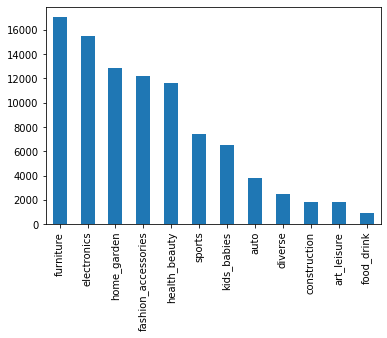

In [72]:
d3['product_main_category'] = \
    d3['product_category_name_english'].apply(lambda x: main_cats[x])

d3['product_main_category'].value_counts().plot.bar()

### New variable: "volume" + switch to log

In [73]:
d3['volume'] = d3['product_length_cm'] * d3['product_height_cm'] \
    * d3['product_width_cm']

(0, 150000)

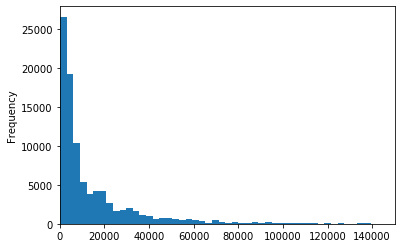

In [74]:
d3['volume'].plot.hist(bins=100)
plt.xlim(0, 150000)

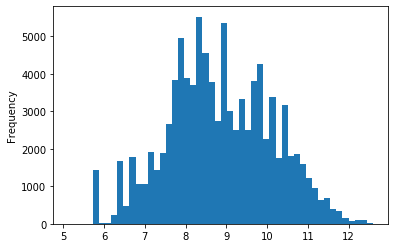

In [75]:
d3['volume_log'] = np.log(d3['volume'] + 1)
d3['volume_log'].plot.hist(bins=50)

### Product_weight > switch to log

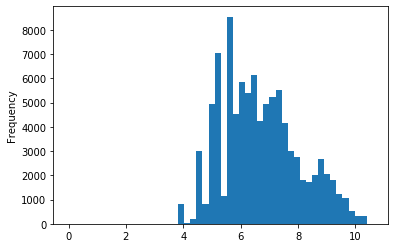

In [76]:
d3['product_weight_log'] = np.log(d3['product_weight_g'] + 1)
d3['product_weight_log'].plot.hist(bins=50)

### Payment_type > boolean value

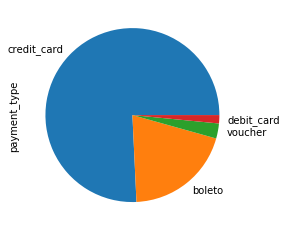

In [77]:
d3['payment_type'].value_counts().plot.pie()

In [78]:
d3['payment_credit_card'] = d3['payment_type'] == 'credit_card'

### Payment_value > deleting the extreme values

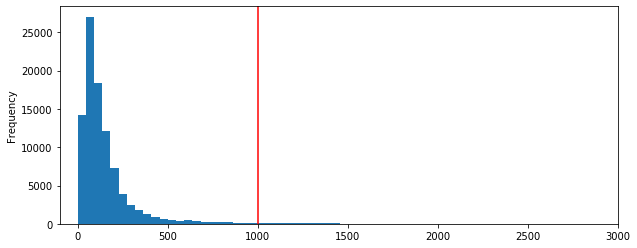

In [79]:
d3['payment_value'].plot.hist(bins=300, figsize=(10, 4))
plt.axvline(1000, c='red')
plt.xlim(-100, 3000)
plt.show()

In [80]:
d3 = d3[d3['payment_value'] < 1000]

### Payment_installements > deleting the extreme values

In [81]:
d3 = d3[d3['payment_installments'] < 11]

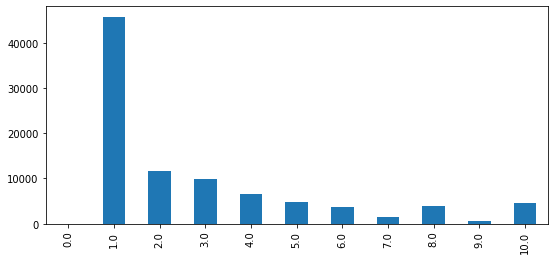

In [82]:
d3['payment_installments'].value_counts().sort_index().plot.bar(figsize=(9, 4))

In [83]:
d4 = d3.loc[:, ['recency', 'more_than_one_item', 'product_main_category',
                'volume_log', 'product_weight_log', 'payment_credit_card',
                'payment_value', 'payment_installments', 'review_score']]

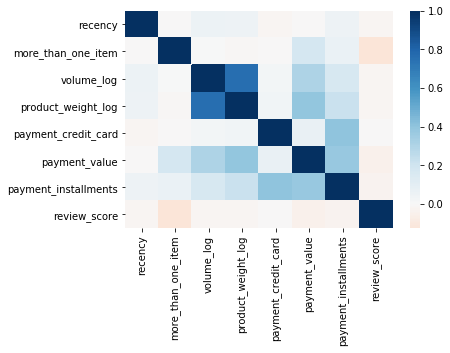

In [84]:
plt.figure(figsize=(6, 4))
sns.heatmap(d4.corr(), cmap='RdBu', center=0)
plt.show()

In [85]:
d4.describe()

,recency,volume_log,product_weight_log,payment_value,payment_installments,review_score
count,92621.000000,92621.000000,92621.000000,92621.000000,92621.000000,92621.000000
mean,243.155731,8.832495,6.676575,141.781974,2.831064,4.093499
std,153.349285,1.271829,1.319859,133.634460,2.572641,1.338677
min,0.000000,5.129899,0.000000,0.000000,0.000000,1.000000
25%,119.000000,7.943428,5.707110,59.680000,1.000000,4.000000
50%,224.000000,8.754161,6.516193,102.030000,2.000000,5.000000
75%,353.000000,9.798183,7.496097,171.830000,4.000000,5.000000
max,728.000000,12.591338,10.607228,999.680000,10.000000,5.000000


The variables 'volume_log' and 'weight_log' being highly correlated, we keep only one out of the two.

In [86]:
d4.drop('product_weight_log', axis=1, inplace=True)

In [87]:
d4.head()

,recency,more_than_one_item,product_main_category,volume_log,payment_credit_card,payment_value,payment_installments,review_score
0.0,474,False,furniture,11.581864,True,146.87,2.0,4.0
1.0,233,False,home_garden,10.885585,True,335.48,8.0,5.0
2.0,106,False,furniture,10.735723,True,157.73,7.0,5.0
3.0,173,False,furniture,11.289394,True,173.30,1.0,5.0
4.0,35,False,home_garden,10.070103,True,252.25,8.0,5.0


In [88]:
d4.info()

### Encoding the boolean and categorical values

In [89]:
d4_dummies = pd.get_dummies(d4) * 1
d4_dummies.sample(3)

,recency,more_than_one_item,volume_log,payment_credit_card,payment_value,payment_installments,review_score,product_main_category_art_leisure,product_main_category_auto,product_main_category_construction,product_main_category_diverse,product_main_category_electronics,product_main_category_fashion_accessories,product_main_category_food_drink,product_main_category_furniture,product_main_category_health_beauty,product_main_category_home_garden,product_main_category_kids_babies,product_main_category_sports
28714.0,160,0,8.171034,0,86.96,1.0,3.0,0,0,0,0,1,0,0,0,0,0,0,0
53149.0,110,0,11.271936,1,461.65,5.0,4.0,0,0,0,0,0,0,0,0,0,0,1,0
23788.0,62,0,8.389587,1,78.52,4.0,5.0,0,0,0,0,0,0,0,0,0,0,1,0


### Correlations

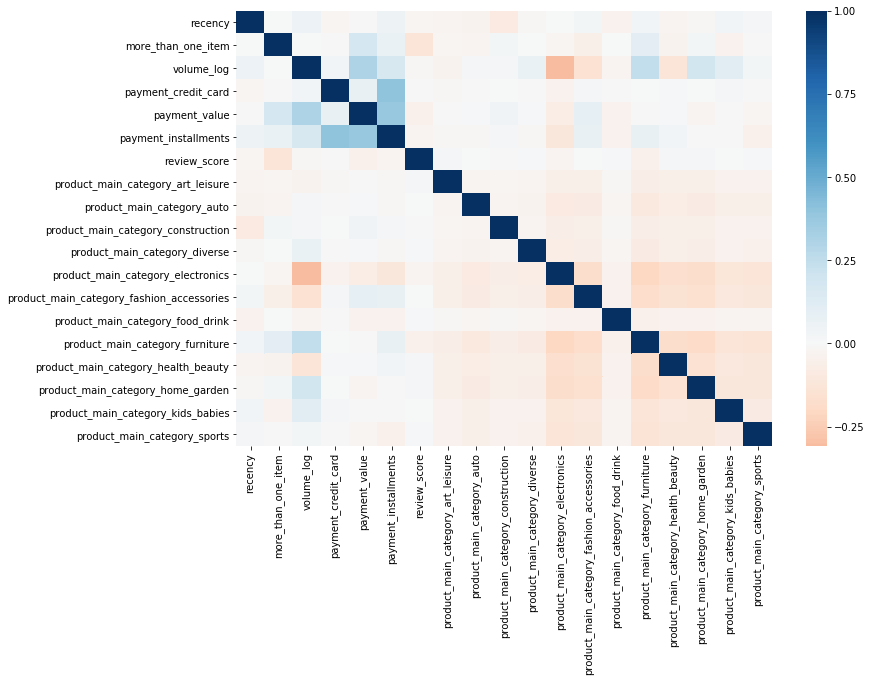

In [90]:
plt.figure(figsize=(12, 8))
sns.heatmap(d4_dummies.corr(), cmap='RdBu', center=0)
plt.show()

### The dataset is now ready for futher processing (clustering, etc.) Let's save it!

In [92]:
d4_dummies.shape

(92621, 19)

In [93]:
d4_dummies.to_csv('p5_clean_V3.csv', index=None)